# Do you want to know why you lose hair?

# Hair Loss Analysis Report
![Hair Loss](hairloss.avif)

## 📖 Executive Summary
This report provides a comprehensive analysis of factors contributing to hair loss based on a dataset that includes various health, lifestyle, and genetic variables. The analysis is divided into three levels: descriptive statistics, data visualization, and machine learning modeling. The goal is to understand which factors are associated with hair loss, identify subgroups at risk, and provide actionable insights for targeted health interventions.

The findings highlight several potential contributing factors such as age, medical conditions, nutritional deficiencies, and stress levels. Additionally, ensemble machine learning models are employed to predict the likelihood of hair loss. Lastly, clustering techniques are used to identify distinct subgroups of individuals.

## Table of Contents
1. Introduction
2. Data Overview
3. Descriptive Statistics
4. Data Visualization
5. Machine Learning Analysis
6. Key Findings and Insights
7. Recommendations
8. Conclusion

## 1. Introduction
Hair loss is a significant health concern that affects both appearance and overall health. This analysis aims to uncover the potential contributing factors to hair loss, including medical, genetic, nutritional, and lifestyle factors, by leveraging data science techniques.

## 2. Data Overview
The dataset contains information on individuals' medical history, lifestyle choices, genetic factors, and more. Each row represents one individual, and the key features include:
- **Medical Conditions**: Various conditions like alopecia, thyroid problems, dermatitis, etc.
- **Lifestyle Factors**: Smoking status, stress levels, weight loss, etc.
- **Genetic Factors**: Family history of baldness.
- **Nutritional Deficiencies**: Deficiencies in essential vitamins and minerals.

## 3. Descriptive Statistics
### Average Age and Age Distribution
- The **average age** of individuals in the dataset was calculated to understand the typical age of participants. The average age of the study participant is 34.19 years. Of men with hair loss, the average age is 33.6 years. Of men with no hair loss, the average age is 34.8 years.
- The **age distribution** was plotted to visualize the spread across different age groups.

### Common Medical Conditions
- The prevalence of each medical condition was determined, showing that **Alopecia Areata** and **Psoriasis** are among the most common.
- **Alopecia Areata** and **Androgenetic Alopecia** are observed to have higher percentages among individuals with hair loss.
- The frequency of each medical condition was calculated to provide insight into which conditions are most closely associated with hair loss.

### Nutritional Deficiencies
- The dataset was analyzed to determine the **types of nutritional deficiencies** present, such as **iron deficiency** and **vitamin D deficiency**.
- Deficiencies in **Magnesium**, **Protein**, and **Vitamin A** seem to have slightly higher percentages among individuals with hair loss
- The occurrence of each deficiency was calculated to identify which deficiencies are more prevalent.

## 4. Data Visualization
### Proportion of Patients with Hair Loss by Age Group
- The proportion of patients experiencing hair loss was plotted across different age groups to understand whether age is a significant factor. The results were inconclusive.
![Age Group](age_group.png)

### Factors Associated with Hair Loss
- A **correlation heatmap** was generated to explore relationships between medical conditions, lifestyle factors, and hair loss.
- The analysis indicated that factors such as **Age Group 31-40**, **Smoking status**, and specific medical conditions have weak to moderate associations with hair loss.
![Correlation](corr.png)

### Hair Loss Under Different Stress Levels
- The dataset was visualized to understand how **stress levels** (low, moderate, high) relate to hair loss.
- The visualizations showed a trend where moderate stress levels were exhibited increased occurrences of hair loss. However the results were inconclusive.
![Stress](stress.png)


## 5. Machine Learning Analysis
### Classification Model for Hair Loss Prediction
- Both linear and non-linear **classification models** were built to predict whether an individual will experience hair loss based on given factors.
- The models were evaluated for accuracy, precision, and recall to determine its effectiveness.
- Most models' accuracy score was low (between 46-53%), akin to a coin flip, due to evidence that the model was underfitting the training dataset. This can be rectified by introducing more data, increasing the model complexity with more features, and deriving new features.

### Cluster Analysis for Hair Loss Subgroups
- **K-Means clustering** was applied to identify potential subgroups among individuals based on their medical and lifestyle factors.
- The clustering results indicated distinct groups that could be useful for targeted health interventions.
![Cluster Analysis Visualization](cluster.png)


### Key Factors Predicting Hair Loss
- **Random Forests** were used to identify the key factors that best predict hair loss.
- Feature importance was calculated to determine which factors (e.g., age, medical conditions) were the most significant predictors.
- The most significant predictors of hair loss were the presence of: **Hormonal Changes**, **Environmental Factors**, **Poor Hair Care Habits**, **Weight Loss**, and **Smoking**. In addition, instances of **Low** and **Moderate Stress Levels** were also strong predictors of hair loss.

## 6. Key Findings and Insights
- **Age** and specific medical conditions like **Alopecia Areata** are associated with a higher likelihood of hair loss, but the relationships are not strong.
- **Stress levels** and **smoking status** appear to have complex interactions with hair loss, suggesting the need for further exploration.
- Cluster analysis identified distinct groups, which could be targeted for personalized health interventions.
- The three clusters are generalized as follows:
- - **Group 1**: Younger Individuals with Moderate Stress and Genetic Factors.
- - **Group 2**: Middle-Aged Individuals with Moderate to High Stress and Hormonal Influences
- - **Group 3**: Middle-Aged, High Stress, and Lifestyle Influences
- Several machine learning algorithms were implemented to predict Hair Loss. Among them, ensemble method models performed best, including Random Forest, Gradient Boosting, and XGBoost. However, the accuracy levels of these models was quite low (46-53%). The best performing model was a stacked model that utilized a combination of decision tree models. It achieved an accuracy level of 57%.
![Model Results](model_results.png)

## 7. Recommendations
- The sample size is too small for the machine learning algorithm to predict hair loss at a high accuracy level. There is evidence that the model is underfitting the dataset. To improve upon the current performance benchmark will require more features and more observations.
- Health interventions could be targeted based on identified clusters, focusing on individuals at higher risk.

## 8. Conclusion
This report provides a comprehensive analysis of factors contributing to hair loss. Although the correlations identified are weak, they provide a foundation for further exploration using more sophisticated modeling techniques. The insights derived from machine learning and clustering can help inform targeted health interventions and personalized care.

# Code and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from itertools import combinations

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import original dataset
data = pd.read_csv('../data/Predict Hair Fall.csv')

# create duplicate
df = data.copy()

# revise column formatting
df.columns = [x.strip() for x in df.columns]

# drop id
df = df.drop('Id', axis = 1)

# reformat Nutritional deficiences
df['Nutritional Deficiencies'] = df['Nutritional Deficiencies'].str.replace('deficiency', '').str.strip()
df['Nutritional Deficiencies'] = df['Nutritional Deficiencies'].str.replace('Deficiency', '').str.strip()
df['Nutritional Deficiencies'] = df['Nutritional Deficiencies'].apply(lambda x: x.strip())

# clean Medical conditions values
df['Medical Conditions'] = df['Medical Conditions'].apply(lambda x: x.strip())

# reformat Medical Conditions, Medications & Treatments, and Nutritional Deficiencies
mapping = {
            'Medical Conditions': 'Conditions', 
            'Medications & Treatments': 'Medications', 
            'Nutritional Deficiencies': 'Deficiencies'
          }
cols = []
for col in df.columns:
    try:
        cols.append(mapping[col])
    except:
        cols.append(col)
df.columns = cols

# # Remap Yes/No Columns
# mapping = {'Yes': 1, 'No': 0}
# for col in ['Genetics', 'Hormonal Changes', 'Poor Hair Care Habits', 'Environmental Factors', 'Smoking', 'Weight Loss']:
#     df[col] = df[col].map(mapping)

df_copy = df.copy()

# preview data
df.head(10)

,Genetics,Hormonal Changes,Conditions,Medications,Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,Yes,No,No Data,No Data,Magnesium,Moderate,19,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium,High,43,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein,Moderate,26,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin,Moderate,46,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron,Moderate,30,No,Yes,Yes,No,1
5,Yes,No,Psoriasis,Antibiotics,Magnesium,Low,37,No,Yes,No,Yes,1
6,Yes,Yes,No Data,No Data,Selenium,High,40,Yes,No,No,No,1
7,Yes,No,Dermatosis,Chemotherapy,Omega-3 fatty acids,High,35,Yes,No,Yes,No,0
8,Yes,No,Eczema,Steroids,Selenium,Moderate,19,No,No,Yes,Yes,1
9,No,Yes,Ringworm,Rogaine,Magnesium,Moderate,49,Yes,Yes,Yes,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Genetics               999 non-null    object
 1   Hormonal Changes       999 non-null    object
 2   Conditions             999 non-null    object
 3   Medications            999 non-null    object
 4   Deficiencies           999 non-null    object
 5   Stress                 999 non-null    object
 6   Age                    999 non-null    int64 
 7   Poor Hair Care Habits  999 non-null    object
 8   Environmental Factors  999 non-null    object
 9   Smoking                999 non-null    object
 10  Weight Loss            999 non-null    object
 11  Hair Loss              999 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 93.8+ KB


In [4]:
df.isnull().sum()

Genetics                 0
Hormonal Changes         0
Conditions               0
Medications              0
Deficiencies             0
Stress                   0
Age                      0
Poor Hair Care Habits    0
Environmental Factors    0
Smoking                  0
Weight Loss              0
Hair Loss                0
dtype: int64

# Level 1: Descriptive Statistics

## 1A. What is the average age of observations?

In [5]:
# Age Analysis
average_age = df['Age'].mean()
median_age = df['Age'].median()
min_age = df['Age'].min()
max_age = df['Age'].max()

print(f'Average age is {round(average_age, 2)} years')
print(f'Median age is {round(median_age, 2)} years')
print(f'Youngest age is {min_age} years')
print(f'Oldest age is {max_age} years')

Average age is 34.19 years
Median age is 34.0 years
Youngest age is 18 years
Oldest age is 50 years


In [6]:
average_age_no_hair_loss = df[df['Hair Loss'] == 0]['Age'].mean()
average_age_hair_loss = df[df['Hair Loss'] == 1]['Age'].mean()

print(f'The average age of men with hair loss is {round(average_age_hair_loss, 2)}')
print(f'The average age of men with no hair loss is {round(average_age_no_hair_loss, 2)}')

The average age of men with hair loss is 33.6
The average age of men with no hair loss is 34.77


## 1B. What is the age distribution?

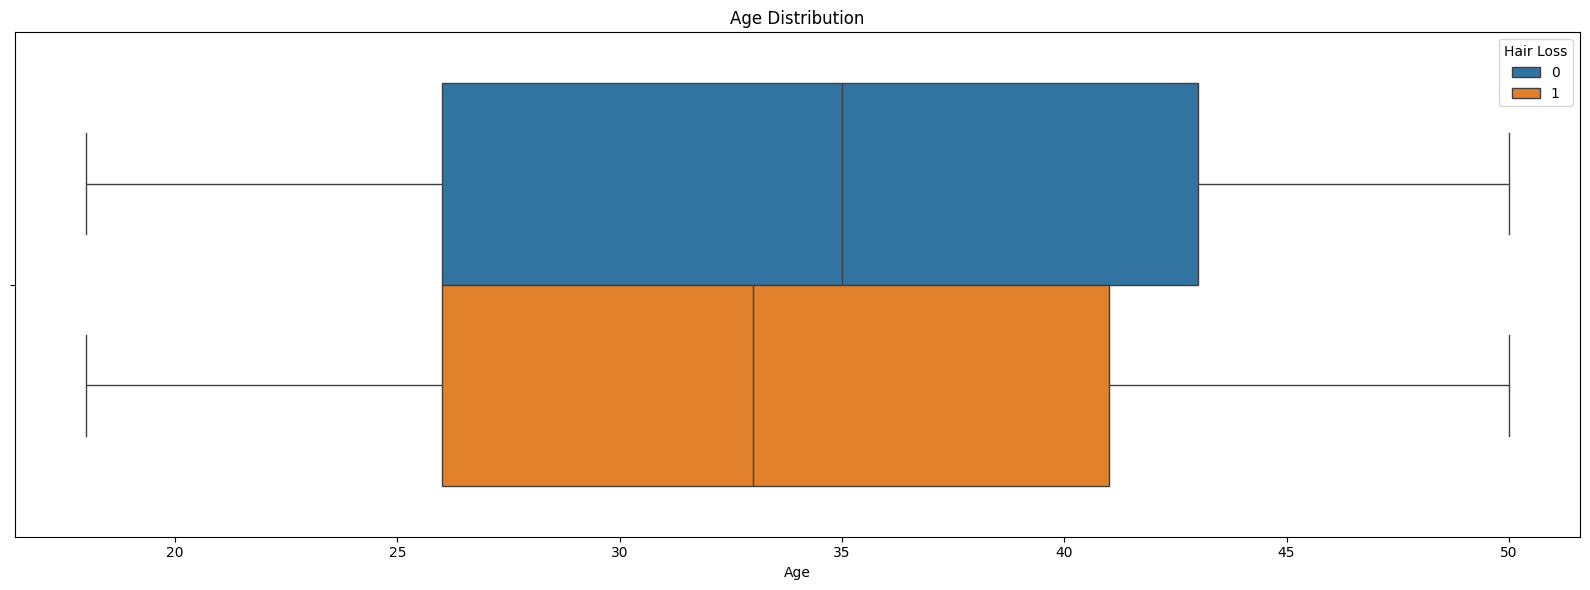

In [7]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df, hue = 'Hair Loss', x = 'Age')
plt.title("Age Distribution")
plt.tight_layout()

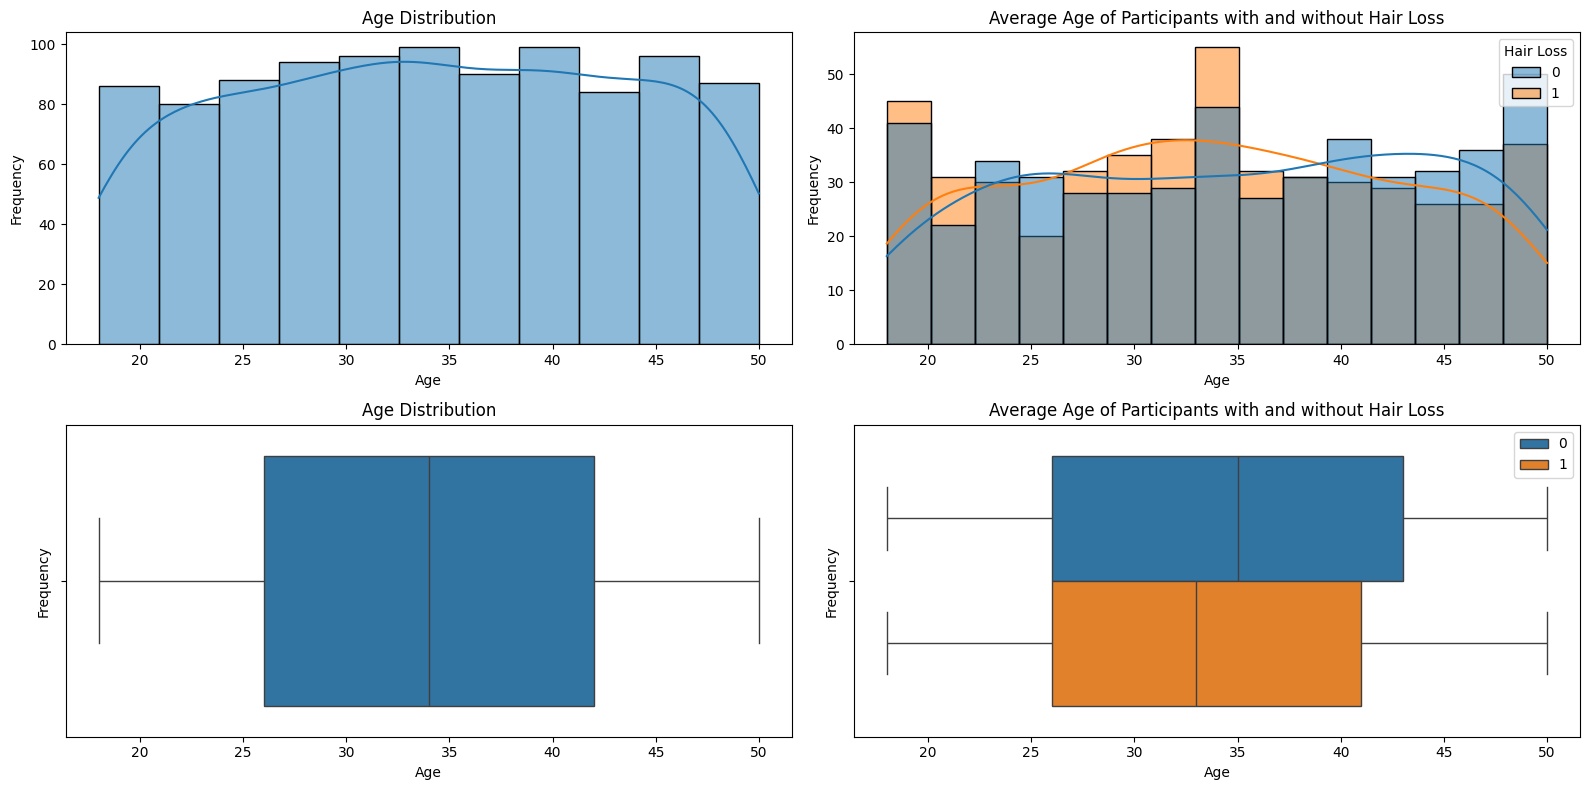

In [32]:
fig, axs = plt.subplots(2, 2, figsize = (16, 8))
axs = axs.flatten()

sns.histplot(data = df, x = 'Age', kde=True, ax = axs[0])
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Average age of bald and non-bald observations
sns.histplot(data=df, x='Age', hue='Hair Loss', kde = True, bins = 15, ax = axs[1], alpha = 0.5)
axs[1].set_title('Average Age of Participants with and without Hair Loss')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')

sns.boxplot(data = df, x = 'Age', ax = axs[2])
axs[2].set_title('Age Distribution')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Frequency')

# Average age of bald and non-bald observations
sns.boxplot(data=df, x='Age', hue='Hair Loss', ax = axs[3])
axs[3].set_title('Average Age of Participants with and without Hair Loss')
axs[3].set_xlabel('Age')
axs[3].set_ylabel('Frequency')
axs[3].legend(loc='upper right')


plt.tight_layout()
plt.show()

## 2A. Which medical conditions are the most common? How often do they occur?

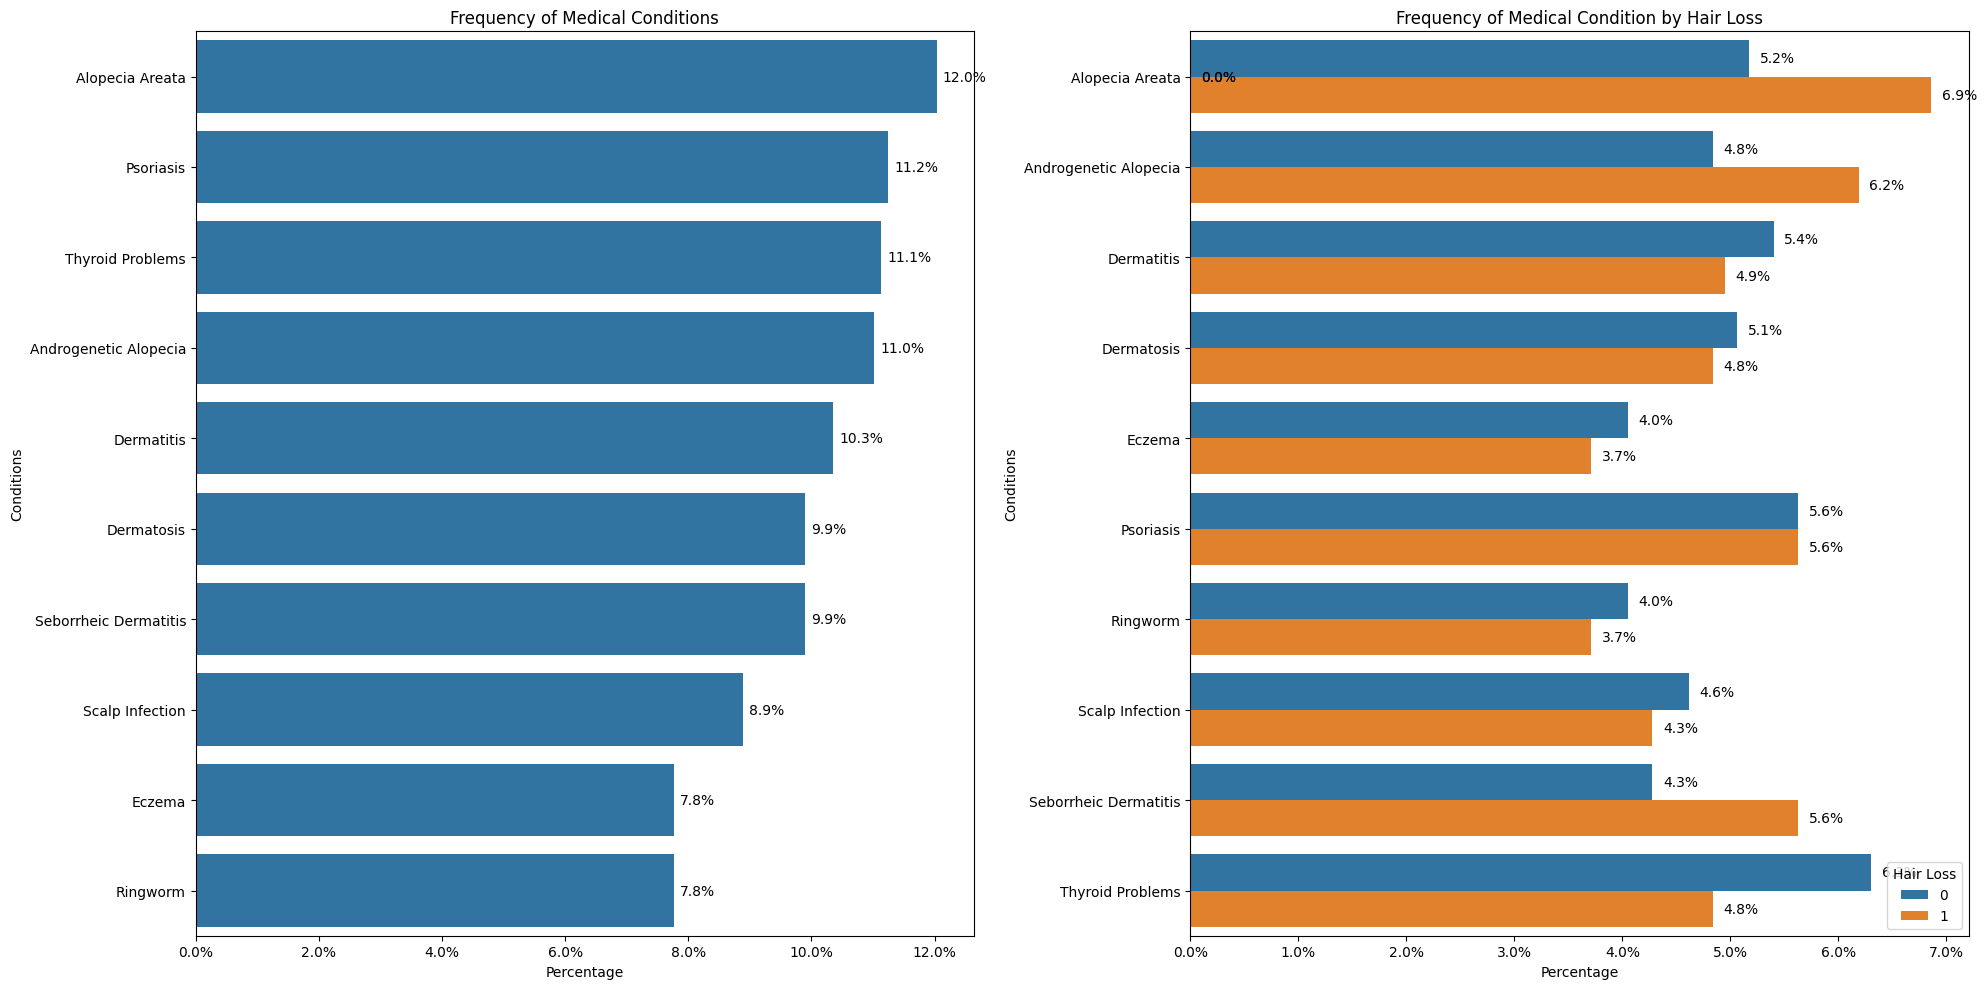

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# Most common medical conditions
df1 = df.copy()
df1 = df1[df1['Conditions'] != 'No Data']
df1 = df1['Conditions'].value_counts(normalize = True).sort_values(ascending = False).reset_index()

# plot the bar chart
sns.barplot(data = df1, x = 'proportion', y = 'Conditions', ax = ax1)

ax1.set_xlabel("Percentage")
ax1.set_title('Frequency of Medical Conditions')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Display percentage labels on each bar
for p in ax1.patches:
    percentage = f'{100 * p.get_width():.1f}%'
    ax1.text(p.get_width() + 0.001, p.get_y() + p.get_height() / 2, percentage, va='center')


df1 = df.copy()
df1 = df1[df1['Conditions'] != "No Data"]
count = df1.shape[0]
df1 = df1.groupby(['Conditions', 'Hair Loss'])['Genetics'].count().reset_index()
df1['Genetics'] = df1['Genetics'] / count
#df1 = pd.pivot(data = df1, columns = 'Hair Loss', index = 'Conditions', values = 'Genetics')
df1 = df1.sort_index(ascending = True)

sns.barplot(data = df1, y = 'Conditions', x = 'Genetics', hue = 'Hair Loss', ax = ax2)
ax2.set_xlabel("Percentage")
ax2.set_title('Frequency of Medical Condition by Hair Loss')
ax2.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for p in ax2.patches:
    percentage = f'{100 * p.get_width():.1f}%'
    ax2.text(p.get_width() + 0.001, p.get_y() + p.get_height() / 2, percentage, va='center')


plt.tight_layout()
plt.show()

## 3. What types of nutritional deficiencies are there and how often do they occur?

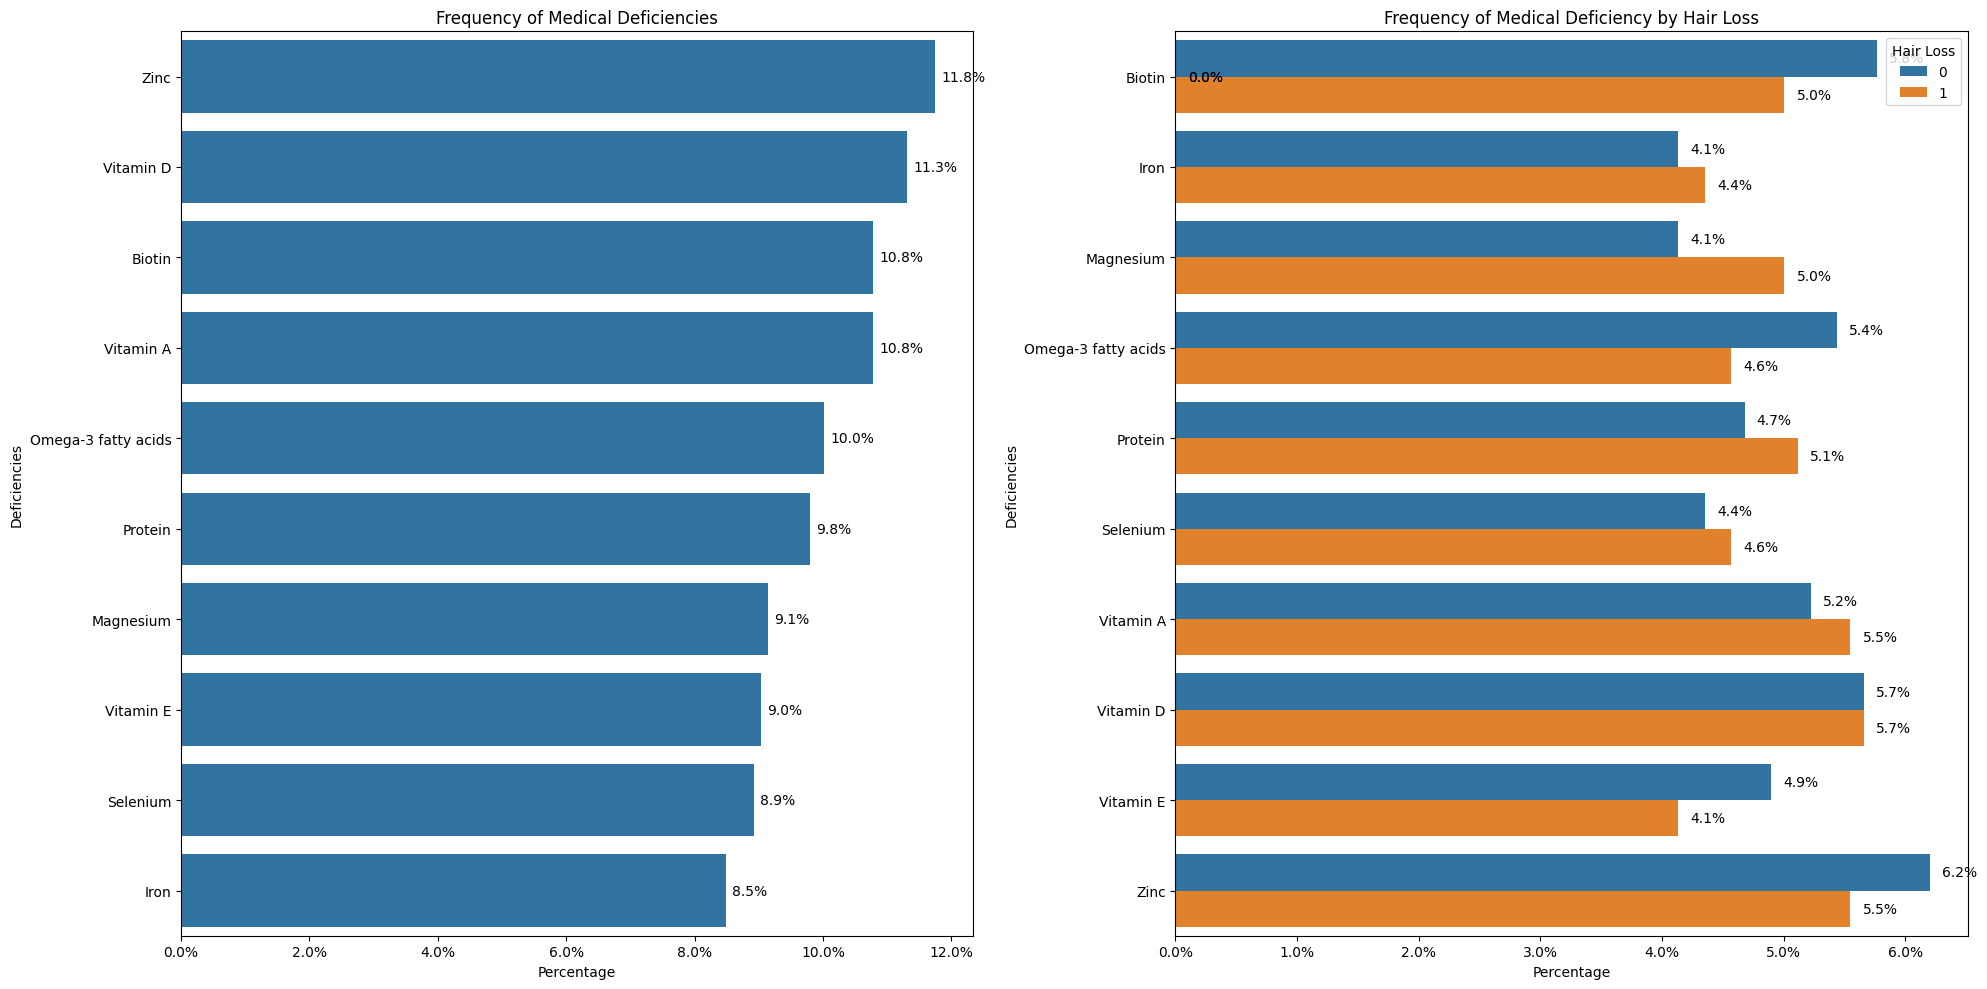

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# Most common medical deficiencies
df1 = df.copy()
df1 = df1[df1['Deficiencies'] != 'No Data']
df1 = df1['Deficiencies'].value_counts(normalize = True).sort_values(ascending = False).reset_index()

# plot the bar chart
sns.barplot(data = df1, x = 'proportion', y = 'Deficiencies', ax = ax1)

ax1.set_xlabel("Percentage")
ax1.set_title('Frequency of Medical Deficiencies')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# Display percentage labels on each bar
for p in ax1.patches:
    percentage = f'{100 * p.get_width():.1f}%'
    ax1.text(p.get_width() + 0.001, p.get_y() + p.get_height() / 2, percentage, va='center')


df1 = df.copy()
df1 = df1[df1['Deficiencies'] != "No Data"]
count = df1.shape[0]
df1 = df1.groupby(['Deficiencies', 'Hair Loss'])['Genetics'].count().reset_index()
df1['Genetics'] = df1['Genetics'] / count
#df1 = pd.pivot(data = df1, columns = 'Hair Loss', index = 'Deficiencies', values = 'Genetics')
df1 = df1.sort_index(ascending = True)

sns.barplot(data = df1, y = 'Deficiencies', x = 'Genetics', hue = 'Hair Loss', ax = ax2)
ax2.set_xlabel("Percentage")
ax2.set_title('Frequency of Medical Deficiency by Hair Loss')
ax2.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))


for p in ax2.patches:
    percentage = f'{100 * p.get_width():.1f}%'
    ax2.text(p.get_width() + 0.001, p.get_y() + p.get_height() / 2, percentage, va='center')


plt.tight_layout()
plt.show()

# Level 2: Visualization

## 1. Proportion of patients with hair loss in different age groups

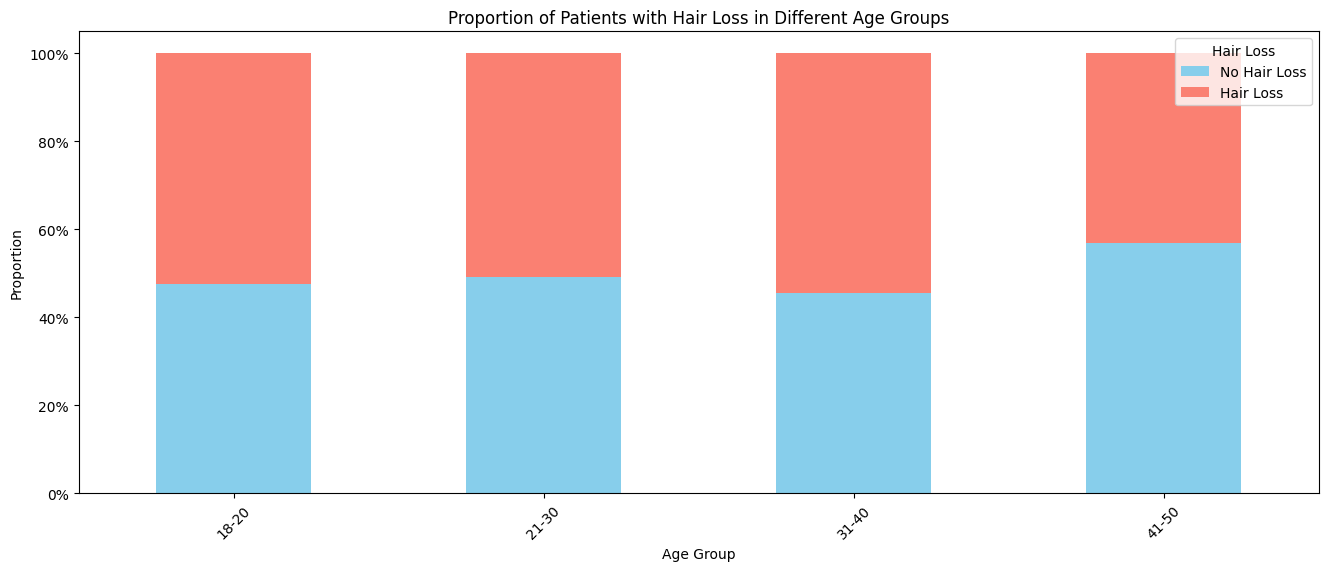

In [11]:
# Create age groups
df1 = df.copy()

df1['Age Group'] = pd.cut(df1['Age'], bins=[0, 20, 30, 40, 50], labels=['18-20', '21-30','31-40', '41-50'])

# Calculate the proportion of hair loss in each age group
age_group_counts = df1.groupby('Age Group')['Hair Loss'].value_counts(normalize=True).unstack()

# Plotting the 100% stacked bar chart
age_group_counts.plot(kind='bar', stacked=True, figsize=(16, 6), color=['skyblue', 'salmon'])
plt.title('Proportion of Patients with Hair Loss in Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(['No Hair Loss', 'Hair Loss'], title='Hair Loss', loc = 'upper right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

## 2. Factors associated with hair loss

Since the correlations are weak, it suggests that no single factor has a dominant effect on predicting hair loss. Instead, hair loss may be influenced by a combination of several small factors.

The presence of Age Group 31-40 and Smoking_No at the top indicates possible relationships worth further exploration in the context of health and lifestyle.

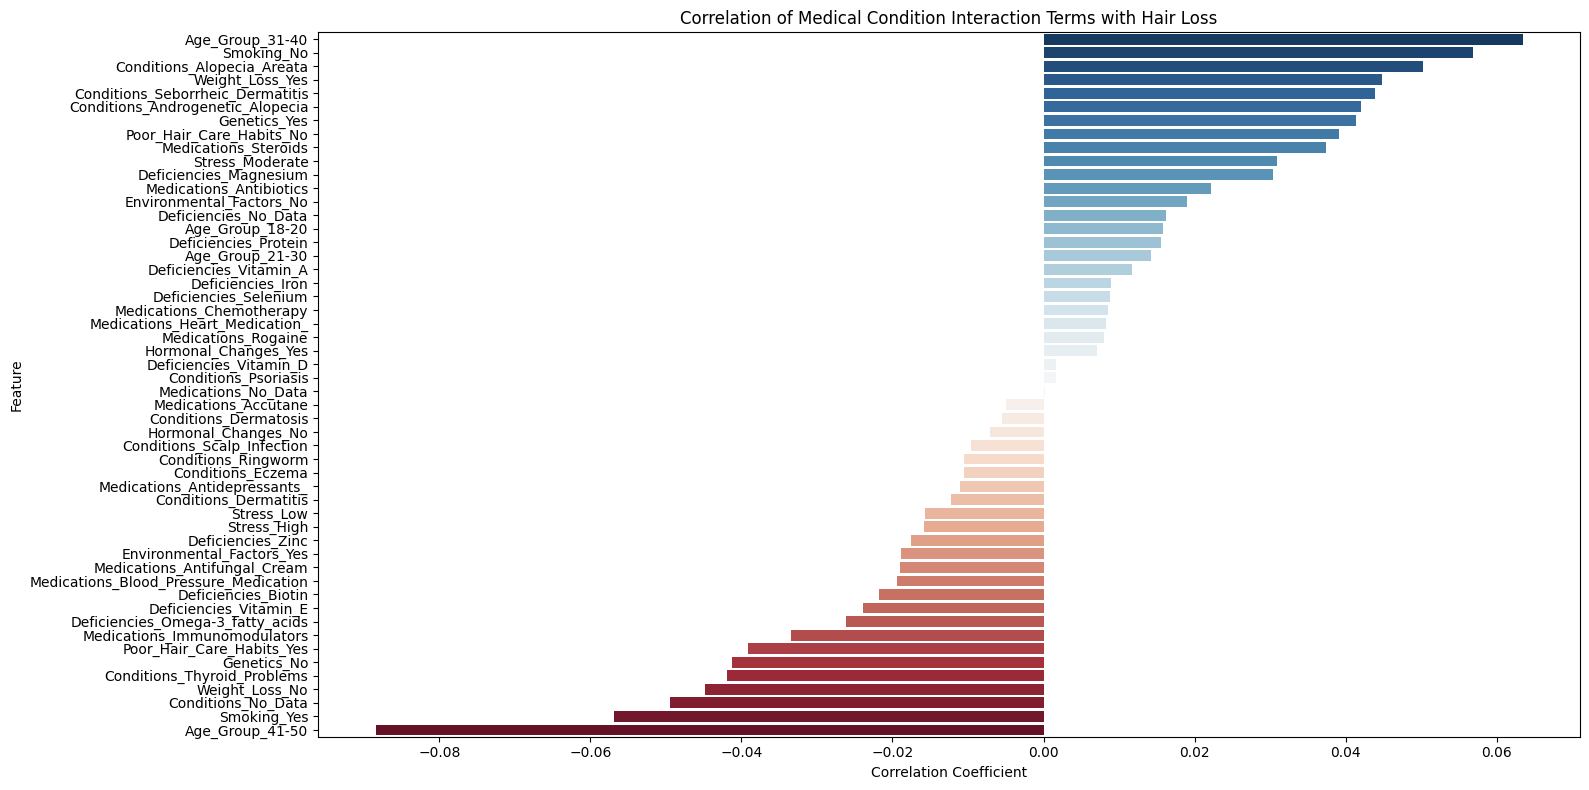

In [12]:
df2 = df1.drop('Age', axis = 1)

# Encoding categorical variables
data_encoded = pd.get_dummies(df2)
data_encoded.columns = [x.replace(" ", "_") for x in data_encoded.columns]

# Correlation matrix
df_corr = data_encoded.corr()

corr_data = df_corr.drop(index = 'Hair_Loss')[['Hair_Loss']].sort_values(by='Hair_Loss', ascending=False)

plt.figure(figsize = (16, 8))
sns.barplot(x=corr_data['Hair_Loss'].values, y=corr_data.index, palette='RdBu_r')
plt.title('Correlation of Medical Condition Interaction Terms with Hair Loss')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

## Smoking vs. Hair Loss

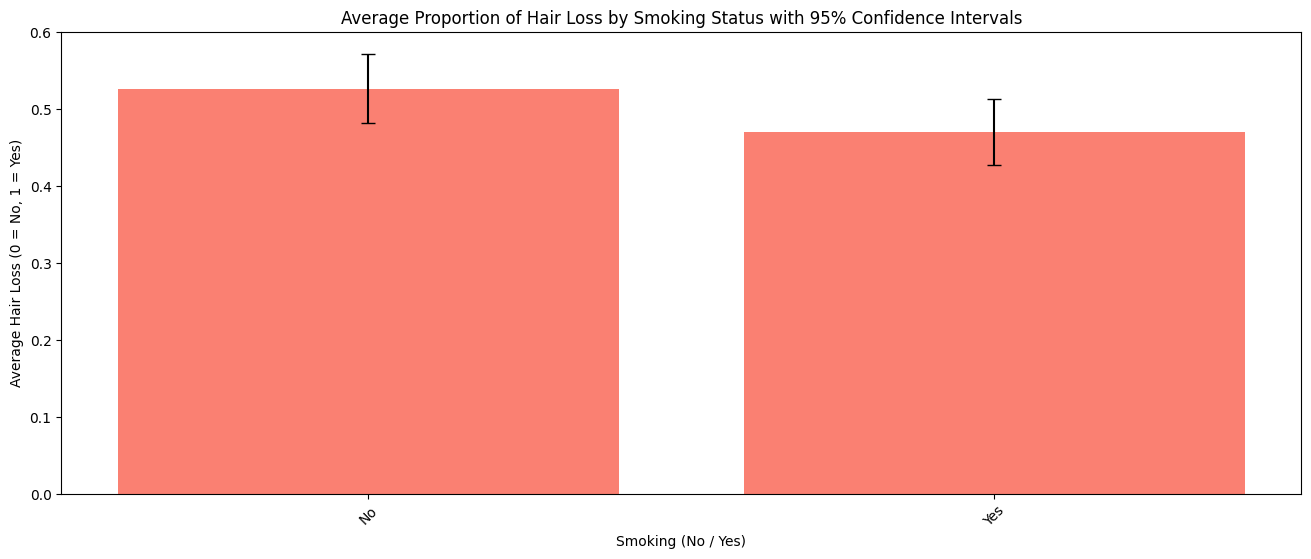

In [13]:
plt.figure(figsize=(16, 6))
means = df.groupby('Smoking')['Hair Loss'].mean()
std_errors = df.groupby('Smoking')['Hair Loss'].apply(lambda x: stats.sem(x, nan_policy='omit'))
conf_intervals = 1.96 * std_errors  # 95% confidence interval

plt.bar(means.index, means, yerr=conf_intervals, color='salmon', capsize=5)
plt.title('Average Proportion of Hair Loss by Smoking Status with 95% Confidence Intervals')
plt.xlabel('Smoking (No / Yes)')
plt.ylabel('Average Hair Loss (0 = No, 1 = Yes)')
plt.xticks(rotation=45)
plt.show()

### Age Group vs. Hair Loss

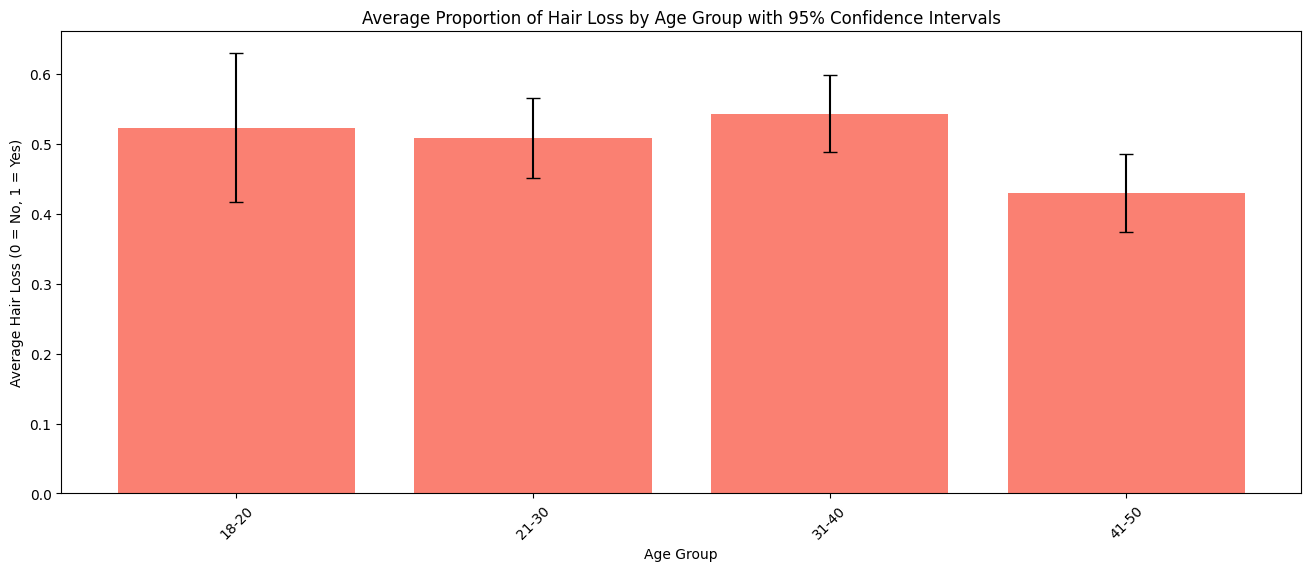

In [14]:
# Age Group vs Hair Loss
plt.figure(figsize=(16, 6))
means = df1.groupby('Age Group')['Hair Loss'].mean()
std_errors = df1.groupby('Age Group')['Hair Loss'].apply(lambda x: stats.sem(x, nan_policy='omit'))
conf_intervals = 1.96 * std_errors  # 95% confidence interval

plt.bar(means.index, means, yerr=conf_intervals, color='salmon', capsize=5)
plt.title('Average Proportion of Hair Loss by Age Group with 95% Confidence Intervals')
plt.xlabel('Age Group')
plt.ylabel('Average Hair Loss (0 = No, 1 = Yes)')
plt.xticks(rotation=45)
plt.show()

### Weight Loss vs. Hair Loss

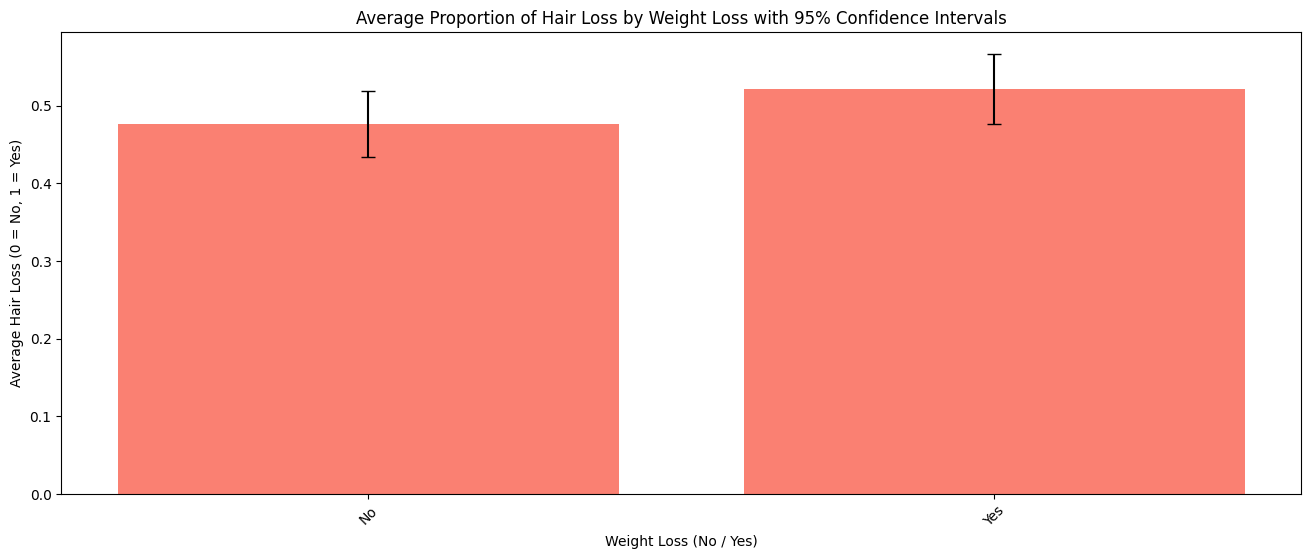

In [15]:
plt.figure(figsize=(16, 6))
means = df.groupby('Weight Loss')['Hair Loss'].mean()
std_errors = df.groupby('Weight Loss')['Hair Loss'].apply(lambda x: stats.sem(x, nan_policy='omit'))
conf_intervals = 1.96 * std_errors  # 95% confidence interval

plt.bar(means.index, means, yerr=conf_intervals, color='salmon', capsize=5)
plt.title('Average Proportion of Hair Loss by Weight Loss with 95% Confidence Intervals')
plt.xlabel('Weight Loss (No / Yes)')
plt.ylabel('Average Hair Loss (0 = No, 1 = Yes)')
plt.xticks(rotation=45)
plt.show()

### Stress Levels vs. Hair Loss

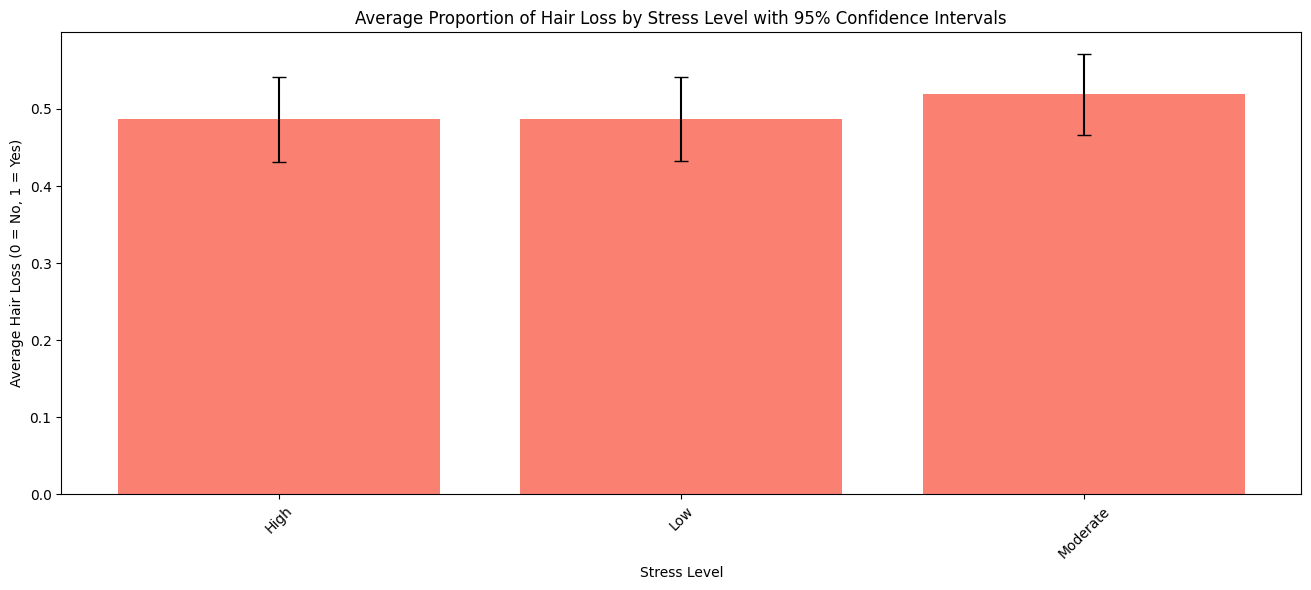

In [132]:
plt.figure(figsize=(16, 6))
means = df.groupby('Stress')['Hair Loss'].mean()
std_errors = df.groupby('Stress')['Hair Loss'].apply(lambda x: stats.sem(x, nan_policy='omit'))
conf_intervals = 1.96 * std_errors  # 95% confidence interval

plt.bar(means.index, means, yerr=conf_intervals, color='salmon', capsize=5)
plt.title('Average Proportion of Hair Loss by Stress Level with 95% Confidence Intervals')
plt.xlabel('Stress Level')
plt.ylabel('Average Hair Loss (0 = No, 1 = Yes)')
plt.xticks(rotation=45)
plt.show()

### Medical Conditions vs. Hair Loss

- Alopecia Areata, Seborrheic Dermatitis, and Androgenetic Alopecia show the highest average proportion of hair loss (approximately 0.55-0.6). This suggests that individuals with these medical conditions are more likely to experience hair loss.
- Conditions like Ringworm, Thyroid Problems, and Eczema tend to have slightly lower average proportions of hair loss, closer to 0.4-0.5.
- The error bars for most conditions are quite large, indicating considerable uncertainty and variability in these proportions. This suggests that, while there might be an association between some medical conditions and hair loss, the data shows a lot of individual differences.

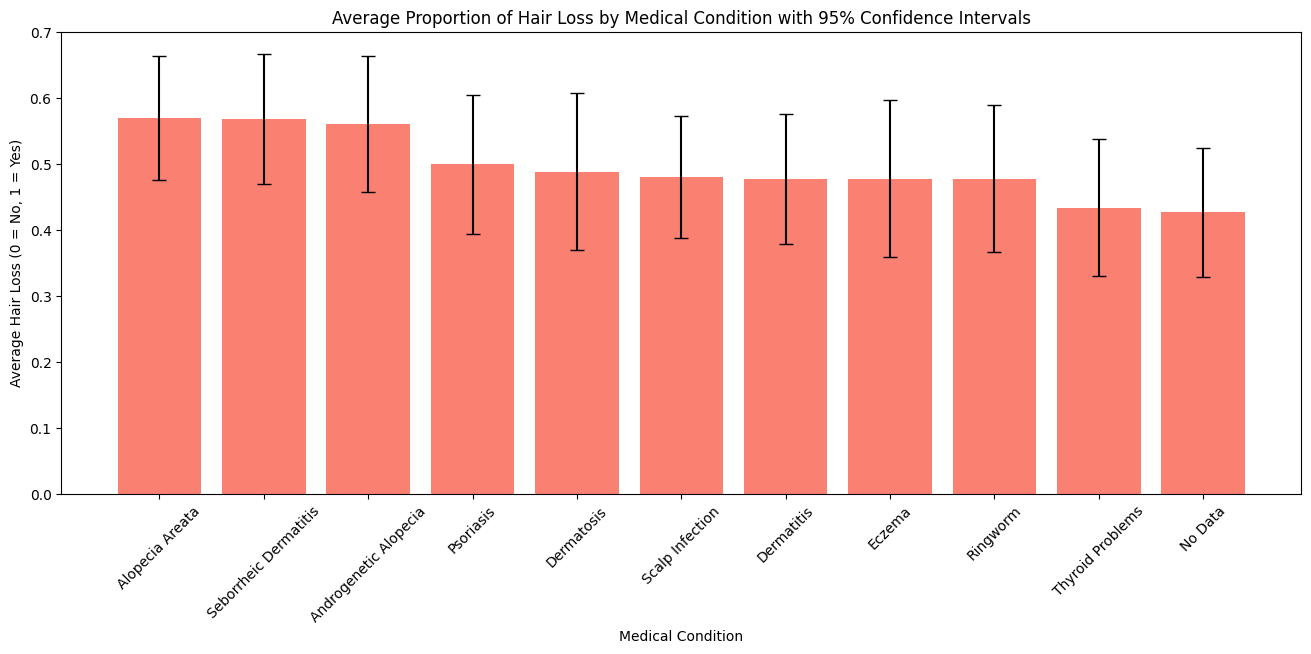

In [16]:
plt.figure(figsize=(16, 6))
means = df.groupby('Conditions')['Hair Loss'].mean().sort_values(ascending = False)
std_errors = df.groupby('Conditions')['Hair Loss'].apply(lambda x: stats.sem(x, nan_policy='omit'))
conf_intervals = 1.96 * std_errors  # 95% confidence interval

plt.bar(means.index, means, yerr=conf_intervals, color='salmon', capsize=5)
plt.title('Average Proportion of Hair Loss by Medical Condition with 95% Confidence Intervals')
plt.xlabel('Medical Condition')
plt.ylabel('Average Hair Loss (0 = No, 1 = Yes)')
plt.xticks(rotation=45)
plt.show()

## Interaction Effects of Genetics, Stress, and Age Group on Hair Loss

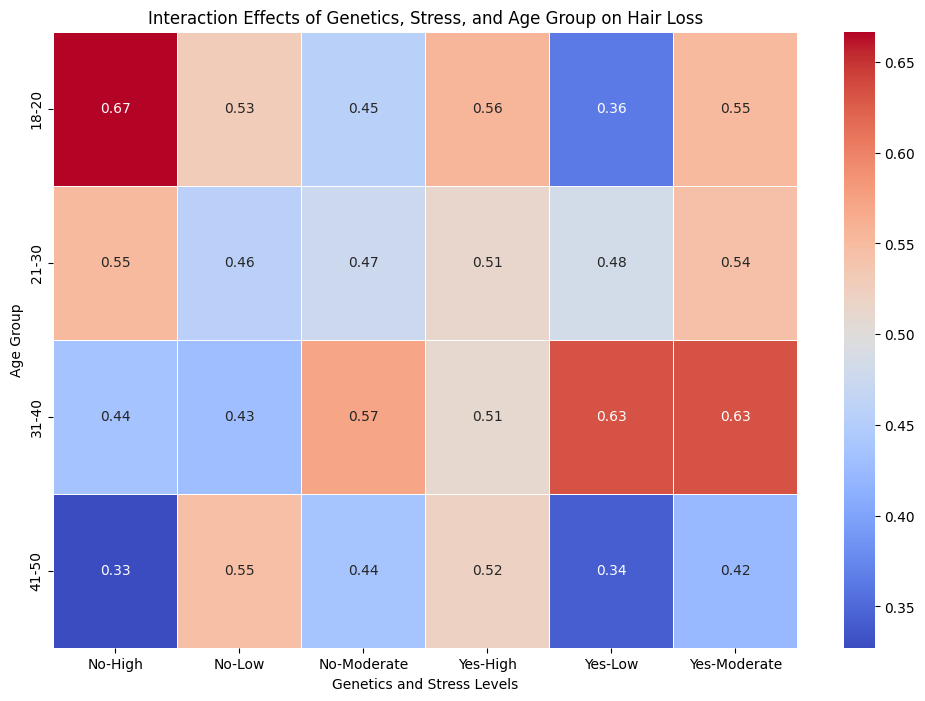

In [17]:
# Group by combined categories to see interaction effects, e.g., Genetics, Stress, and Age Group
interaction_means = df1.groupby(['Genetics', 'Stress', 'Age Group'], observed=False)['Hair Loss'].mean().reset_index()
interaction_means_pivot = interaction_means.pivot_table(index='Age Group', columns=['Genetics', 'Stress'], values='Hair Loss', observed = False)

plt.figure(figsize=(12, 8))
sns.heatmap(interaction_means_pivot, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Interaction Effects of Genetics, Stress, and Age Group on Hair Loss')
plt.xlabel('Genetics and Stress Levels')
plt.ylabel('Age Group')
plt.show()

### Feature Importances

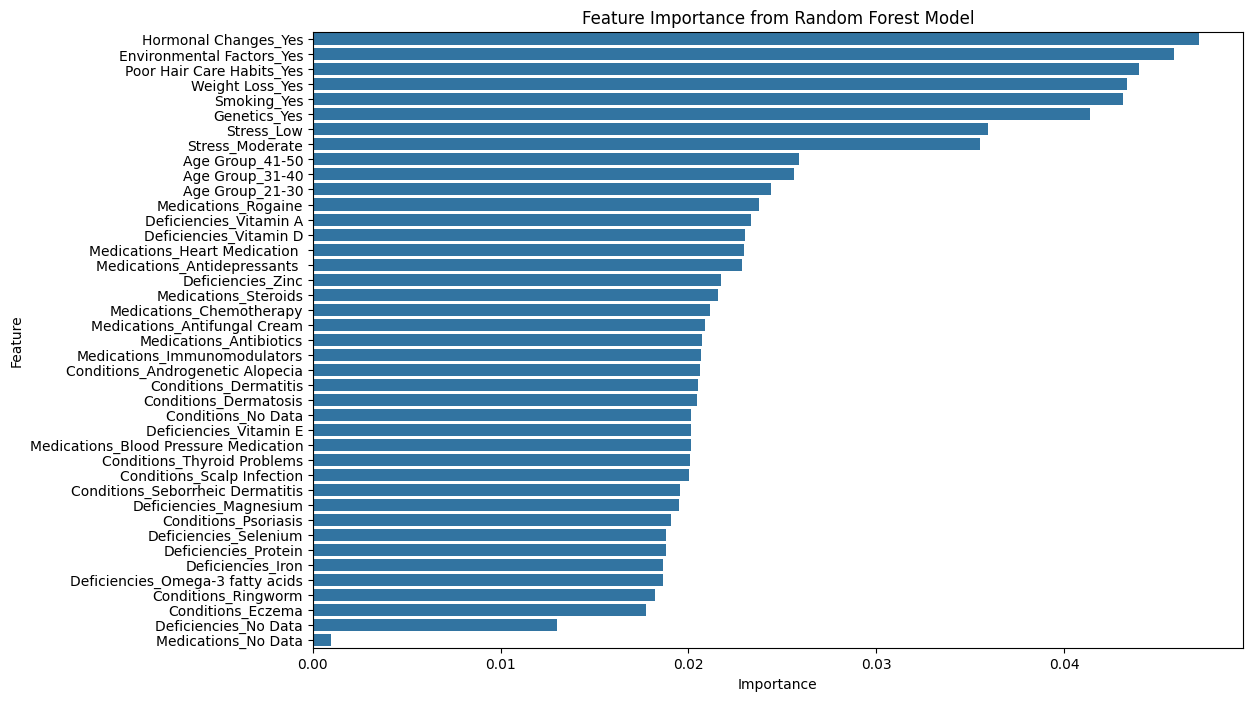

In [18]:
# create dataset
df2 = df1.drop('Age', axis = 1)
data_encoded = pd.get_dummies(df2, drop_first=True, dtype = 'int')

# Prepare data for modeling
X = data_encoded.drop(columns=['Hair Loss'])
y = data_encoded['Hair Loss']

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Level 3: Machine Learning

In [138]:
# split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model_results = []

## Logistic Regression

Accuracy Score: 0.515
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.66      0.55        89
           1       0.59      0.40      0.48       111

    accuracy                           0.52       200
   macro avg       0.53      0.53      0.51       200
weighted avg       0.54      0.52      0.51       200



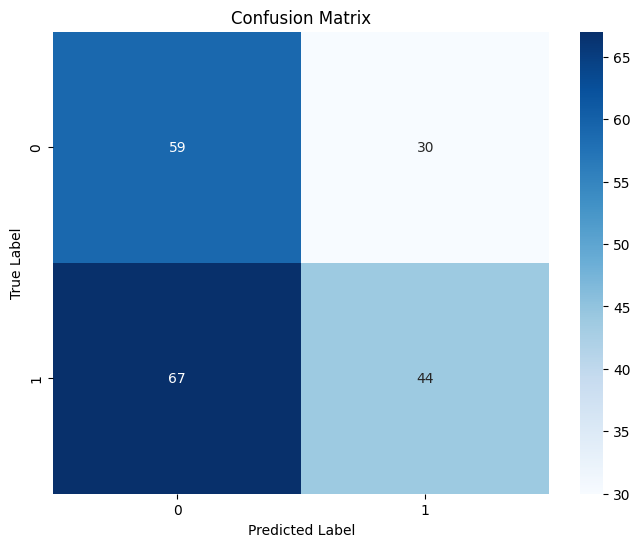

In [139]:
# Gradient Boosting Classifier
logreg_model = LogisticRegression()
model_name = 'Logistic Regression'

logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

model_results.append({'model': model_name, 'accuracy': accuracy})

## Naive Bayes

Accuracy Score: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.63      0.54        89
           1       0.60      0.45      0.52       111

    accuracy                           0.53       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.55      0.53      0.53       200



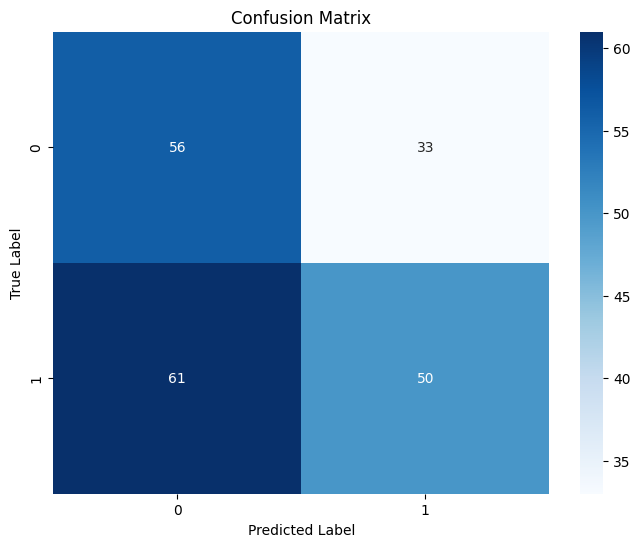

In [140]:
# Gradient Boosting Classifier
nb_model = GaussianNB()
model_name = "Naive Bayes"

nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

model_results.append({'model': model_name, 'accuracy': accuracy})

## Random Forest

Accuracy Score: 0.485
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.64      0.53        89
           1       0.56      0.36      0.44       111

    accuracy                           0.48       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.51      0.48      0.48       200



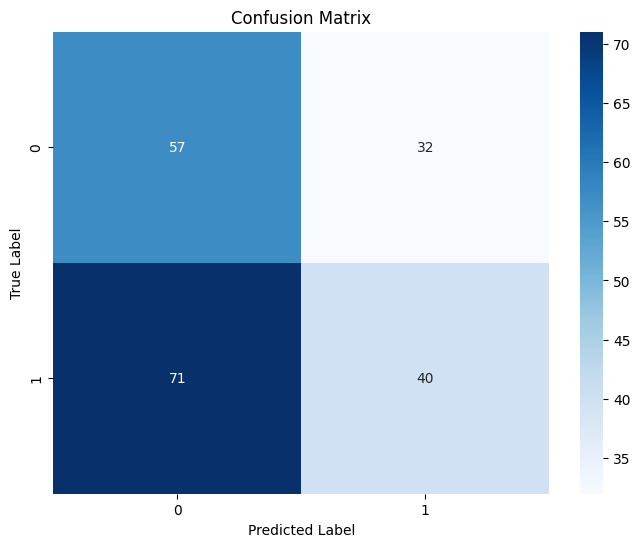

In [141]:
model_name = 'Random Forest'
rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state = 42
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

model_results.append({'model': model_name, 'accuracy': accuracy})

## Gradient Boosting

Accuracy Score: 0.505
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.63      0.53        89
           1       0.58      0.41      0.48       111

    accuracy                           0.51       200
   macro avg       0.52      0.52      0.50       200
weighted avg       0.52      0.51      0.50       200



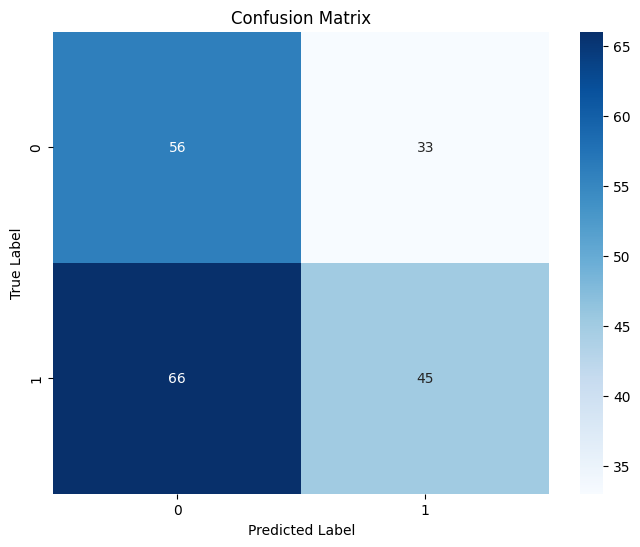

In [142]:
model_name = "Gradient Boosting"
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

model_results.append({'model': model_name, 'accuracy': accuracy})

## XGBoost

Accuracy Score: 0.465
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.60      0.50        89
           1       0.53      0.36      0.43       111

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.46       200
weighted avg       0.48      0.47      0.46       200



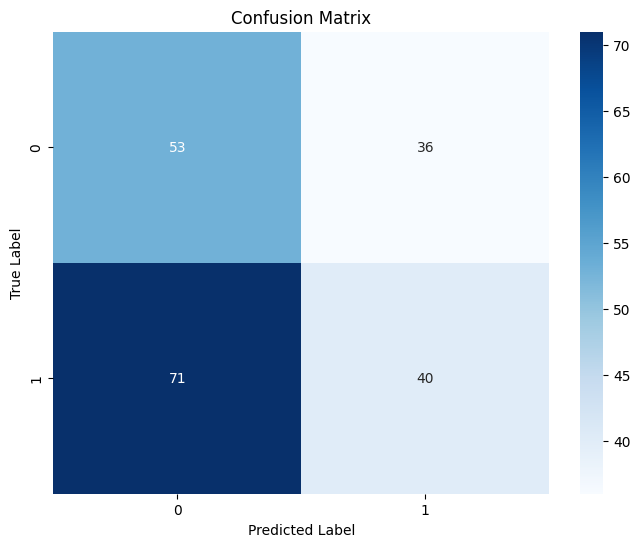

In [143]:
model_name = "XGBoost"
xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

model_results.append({'model': model_name, 'accuracy': accuracy})

## Stacking Model

Accuracy Score: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.67      0.58        89
           1       0.65      0.49      0.56       111

    accuracy                           0.57       200
   macro avg       0.58      0.58      0.57       200
weighted avg       0.59      0.57      0.57       200



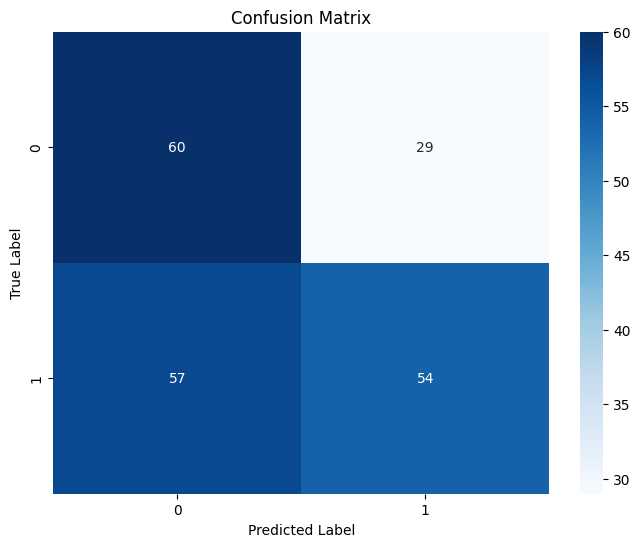

In [144]:
model_name = "Stacking Model"

# Base models for stacking
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Stacking Classifier
estimators = [('xgb', xgb_model), ('rf', rf_model), ('gb', gb_model)]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

model_results.append({'model': model_name, 'accuracy': accuracy})

## Model Results

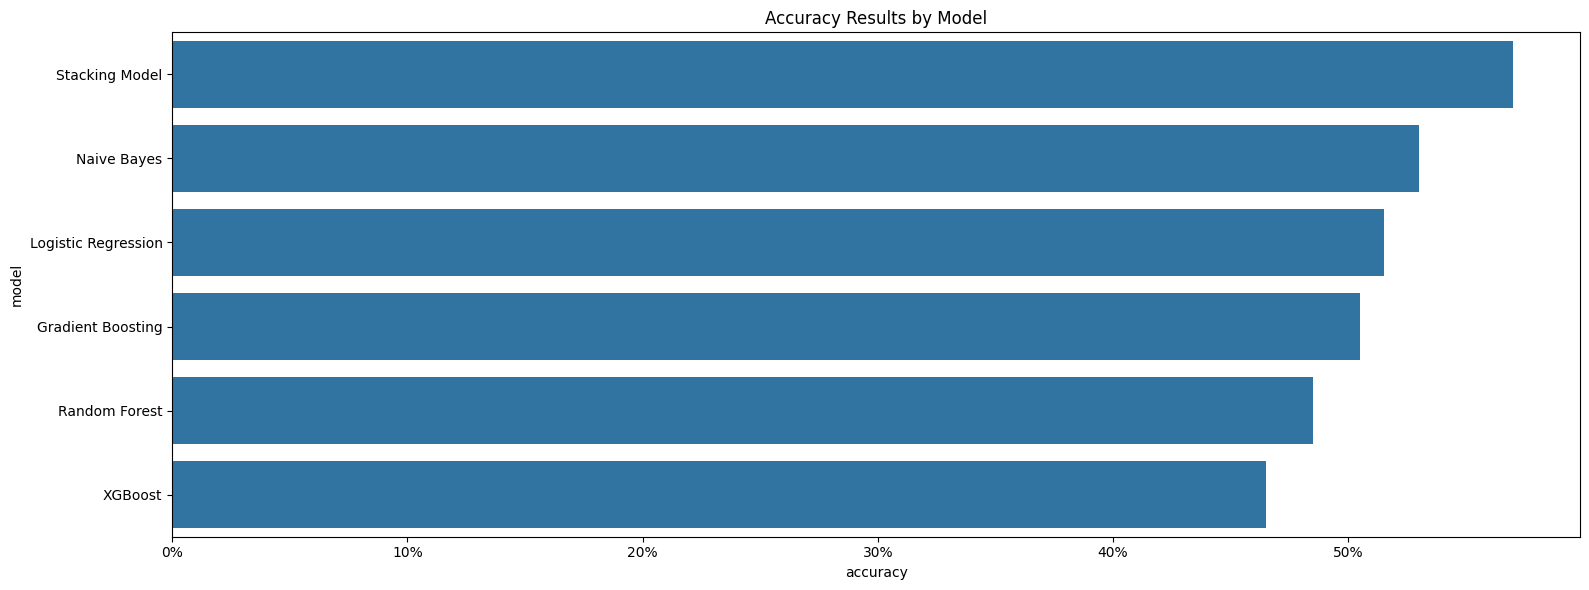

In [155]:
results = pd.DataFrame(model_results).sort_values(by = "accuracy", ascending = False)
plt.figure(figsize = (16, 6))
ax = sns.barplot(results, y = 'model', x = 'accuracy')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title("Accuracy Results by Model")

plt.tight_layout()
plt.show()

## Cluster Analysis

In [120]:
df2 = df_copy.copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

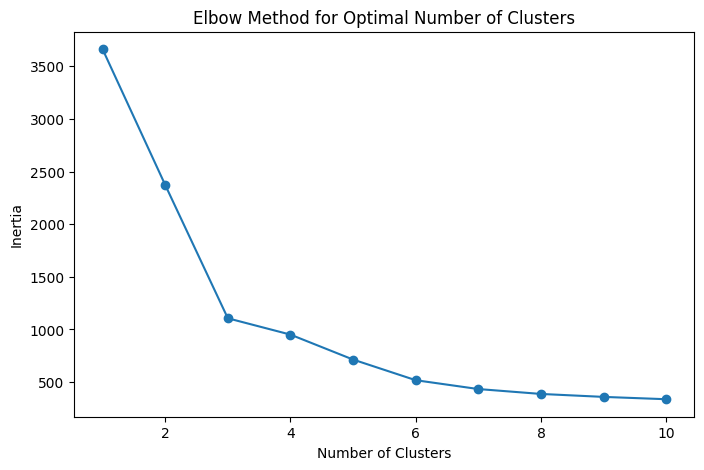

In [121]:
inertia_values = []

# Fit KMeans with different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Plot inertia values against number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [122]:
# K-Means Clustering
df2['Cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca) + 1

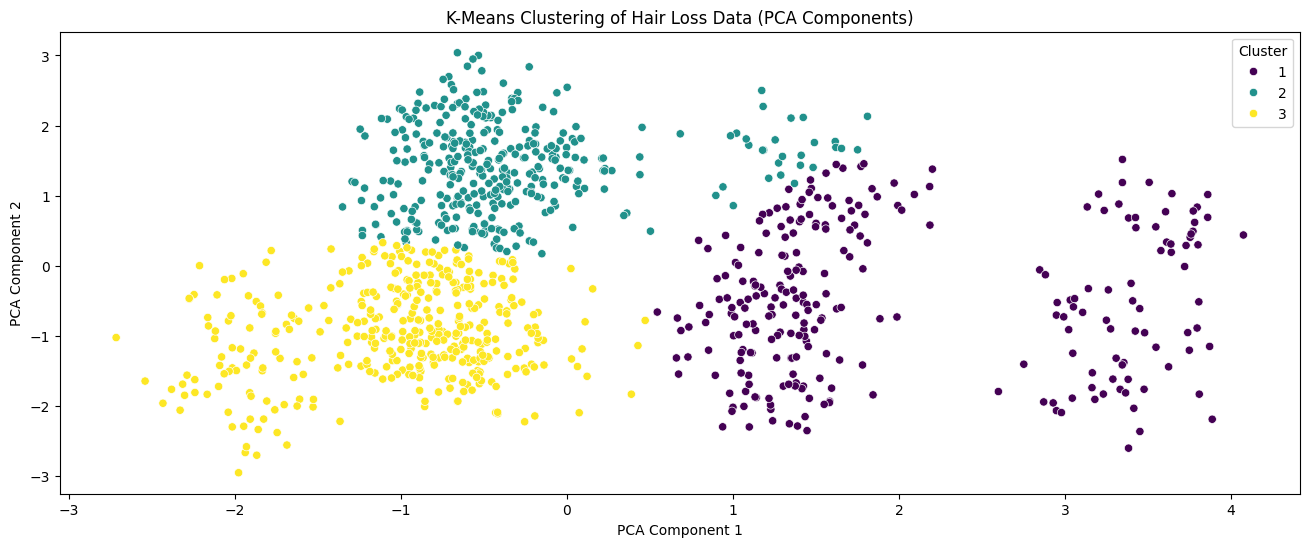

In [123]:
# Visualize the clusters using PCA components
plt.figure(figsize=(16, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df2['Cluster'], palette='viridis')
plt.title('K-Means Clustering of Hair Loss Data (PCA Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

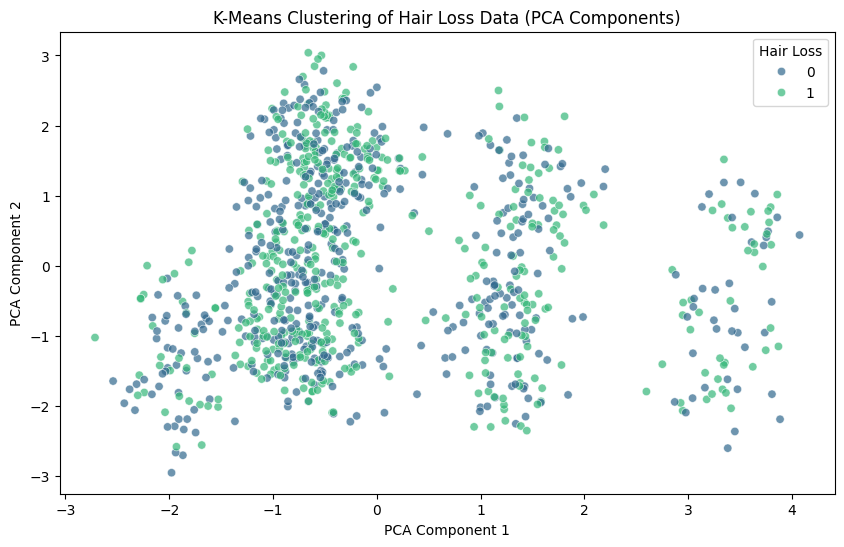

In [124]:
# Visualize the clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Hair Loss'], palette='viridis', alpha = 0.7)
plt.title('K-Means Clustering of Hair Loss Data (PCA Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Hair Loss')
plt.show()

## Cluster Generalization Based on K-Means Clustering

After performing K-Means clustering to divide the dataset into three groups, we calculated the average of each feature for each group. Below is a summary of the characteristics of each group based on the calculated averages.

### Group 1: Younger Individuals with Moderate Stress and Genetic Factors
- **Age**: Average age is **25.5**, indicating a **younger group**.
- **Hair Loss**: About **50.8%** of individuals experience hair loss, indicating a roughly equal distribution of hair loss and non-hair loss cases.
- **Genetics**: **54%** have a family history of baldness, suggesting genetics as a contributing factor.
- **Hormonal Changes**: **50%** have experienced hormonal changes.
- **Medical Conditions**: Common conditions include **Androgenetic Alopecia** (9.9%) and **Psoriasis** (13.4%).
- **Nutritional Deficiencies**: The most common deficiency is **Vitamin A** (9.2%). **30.5%** of individuals have missing data for nutritional deficiencies.
- **Stress Levels**: **35.9%** reported **low stress**, while **27.1%** have **moderate stress**.
- **Other Factors**: **Smoking** and **poor hair care habits** are observed in about **50%** of individuals.

**Generalization**: This group consists of **younger individuals** who are likely experiencing **genetic factors** influencing hair loss. They also have **moderate levels of stress** and moderate prevalence of hair loss.

### Group 2: Middle-Aged Individuals with Moderate to High Stress and Hormonal Influences
- **Age**: Average age is **37**, indicating a **middle-aged group**.
- **Hair Loss**: About **51%** of individuals experience hair loss.
- **Genetics**: **49%** have a family history of baldness.
- **Hormonal Changes**: **55%** have experienced hormonal changes, indicating a **strong hormonal component**.
- **Medical Conditions**: Higher prevalence of **Thyroid Problems** (13.7%) and **Androgenetic Alopecia** (16.8%).
- **Nutritional Deficiencies**: **Vitamin D** deficiency is common (16.5%), followed by **Protein** (14.5%) and **Selenium** (11.7%).
- **Stress Levels**: **79.5%** report **moderate stress**, while only **0.3%** report low stress.
- **Other Factors**: **Smoking** is present in **57.3%** of individuals.

**Generalization**: This group consists of **middle-aged individuals** with a significant influence of **hormonal changes** and a high prevalence of **moderate stress**. They are also more likely to experience certain **medical conditions** such as **thyroid problems**.

### Group 3: Middle-Aged, High Stress, and Lifestyle Influences
- **Age**: Average age is **37.5**, similar to Group 2.
- **Hair Loss**: Slightly lower incidence of hair loss (**47.9%**).
- **Genetics**: **54%** have a family history of baldness.
- **Hormonal Changes**: **48.2%** have experienced hormonal changes, slightly lower than in Group 2.
- **Medical Conditions**: Fewer individuals have **Androgenetic Alopecia** (3.4%) compared to the other groups.
- **Nutritional Deficiencies**: Higher prevalence of **Vitamin A** (12.4%), **Omega-3 fatty acids** (12.2%), and **Zinc** (13.2%).
- **Stress Levels**: **60.1%** of individuals report **low stress**, suggesting that while they experience lifestyle-related issues, stress may be less of a trigger compared to Group 2.
- **Other Factors**: **Weight Loss** is more common in this group (**51.8%**), indicating **weight management issues**.

**Generalization**: This group includes **middle-aged individuals** with **high lifestyle influences** such as **weight loss** and **nutritional deficiencies**. Despite these factors, a higher proportion of individuals report **low stress** compared to Group 2.

## Summary of Groups
- **Group 1**: Younger individuals with a balance of genetic predisposition and moderate stress.
- **Group 2**: Middle-aged individuals experiencing significant hormonal changes and high stress, with common thyroid issues.
- **Group 3**: Middle-aged individuals dealing with lifestyle factors, such as weight loss and nutritional deficiencies, but experiencing lower stress.


In [126]:
df1 = df_copy.copy()
df3 = pd.get_dummies(df1, drop_first = True, dtype = 'int')
df3['Cluster'] = df2['Cluster']
df4 = df3.groupby('Cluster').mean().transpose()
df4.columns = ['Group_' + str(x) for x in df4.columns]
df4

,Group_1,Group_2,Group_3
Age,25.511450,37.039886,37.484456
Hair Loss,0.507634,0.509972,0.479275
Genetics_Yes,0.538168,0.490028,0.541451
Hormonal Changes_Yes,0.496183,0.549858,0.481865
Conditions_Androgenetic Alopecia,0.099237,0.168091,0.033679
Conditions_Dermatitis,0.122137,0.105413,0.059585
Conditions_Dermatosis,0.103053,0.102564,0.064767
Conditions_Eczema,0.087786,0.056980,0.067358
Conditions_No Data,0.000000,0.000000,0.284974
Conditions_Psoriasis,0.133588,0.082621,0.093264


# Conclusion

Thanks for reading to the end!